# Indigo Data Set

### <ul> Preprocessing and Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import datetime
from datetime import timedelta
from datetime import datetime
%matplotlib inline
%config IPCompleter.greedy=True
flight = pd.read_csv("C:\\Users\\MAHE\\Desktop\\data_sets\\Rawflight.csv")

In [2]:
def rel(data):
    corel = data.corr().index
    plt.figure(figsize = (10,10))
    corell=sns.heatmap(data[corel].corr(),annot = True,cmap = 'RdYlGn')

In [2]:
mins =[]
for t in flight.duration:
    m = (int(t.split()[0].split('h')[0])*60) + (int(t.split()[1].split('m')[0]))
    mins.append(m)
flight.replace(["BOM","HYD","NAG","PNQ"],[1,2,3,4],inplace = True)
flight['duration'] = mins
flight['Departure_Date'] = pd.to_datetime(flight.Departure_Date,dayfirst =True)
flight['Search_Date'] = pd.to_datetime(flight.Search_Date,dayfirst =True)
flight['Day_Name'] = flight.Departure_Date.dt.weekday
flight['d_month'] = flight.Departure_Date.dt.month
flight['s_month'] = flight.Search_Date.dt.month
flight['diff_month'] = flight.Departure_Date.dt.month - flight.Search_Date.dt.month
flight.drop_duplicates(inplace = True)
flight.drop('Unnamed: 0',axis = 1,inplace =True)
tofday = []
for i in flight['deptime']:
    j=int(i.split(':')[0])
    if(j >=0 | j<6):
        tofday.append(1)
    elif(j >=6 | j<12):
        tofday.append(2)
    elif(j>=12 | j< 18):
        tofday.append(3)
    else:
        tofday.append(4)
flight['deptime'] = tofday
tofday1 = []
for i in flight['arrtime']:
    j=int(i.split(':')[0])
    if(j >=0 | j<6):
        tofday1.append(1)
    elif(j >=6 | j<12):
        tofday1.append(2)
    elif(j>=12 | j< 18):
        tofday1.append(3)
    else:
        tofday1.append(4)
flight['arrtime'] = tofday1
Indigo = flight.loc[flight['airline'] == 'IndiGo']
Indigo.head()

,Search_Date,Departure_Date,Days_fly,origin,destination,deptime,arrtime,flightno,airline,Total_fare,seats_avail,seatingclass,duration,stops,stop1,stop2,Day_Name,d_month,s_month,diff_month
1412,2019-08-07,2019-08-07,0,DEL,4,3,4,105,IndiGo,5045,17,E,125,0,NaN,NaN,2,8,8,0
1413,2019-08-07,2019-08-08,1,DEL,4,3,4,105,IndiGo,5844,5,E,125,0,NaN,NaN,3,8,8,0
1414,2019-08-07,2019-08-09,2,DEL,4,3,4,105,IndiGo,6144,1,E,125,0,NaN,NaN,4,8,8,0
1415,2019-08-07,2019-08-11,4,DEL,4,3,4,105,IndiGo,6564,1,E,125,0,NaN,NaN,6,8,8,0
1416,2019-08-07,2019-08-12,5,DEL,4,3,4,105,IndiGo,4306,2,E,125,0,NaN,NaN,0,8,8,0


In [3]:
Indigo.reset_index(drop = True,inplace = True)
Indigo.head()

,Search_Date,Departure_Date,Days_fly,origin,destination,deptime,arrtime,flightno,airline,Total_fare,seats_avail,seatingclass,duration,stops,stop1,stop2,Day_Name,d_month,s_month,diff_month
0,2019-08-07,2019-08-07,0,DEL,4,3,4,105,IndiGo,5045,17,E,125,0,NaN,NaN,2,8,8,0
1,2019-08-07,2019-08-08,1,DEL,4,3,4,105,IndiGo,5844,5,E,125,0,NaN,NaN,3,8,8,0
2,2019-08-07,2019-08-09,2,DEL,4,3,4,105,IndiGo,6144,1,E,125,0,NaN,NaN,4,8,8,0
3,2019-08-07,2019-08-11,4,DEL,4,3,4,105,IndiGo,6564,1,E,125,0,NaN,NaN,6,8,8,0
4,2019-08-07,2019-08-12,5,DEL,4,3,4,105,IndiGo,4306,2,E,125,0,NaN,NaN,0,8,8,0


In [4]:
Indigo.shape

(841482, 20)

In [4]:
Indigo.drop(columns = {"origin","seatingclass","stop1","stop2"},axis = 1,inplace = True)
Indigo

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,Search_Date,Departure_Date,Days_fly,destination,deptime,arrtime,flightno,airline,Total_fare,seats_avail,duration,stops,Day_Name,d_month,s_month,diff_month
0,2019-08-07,2019-08-07,0,4,3,4,105,IndiGo,5045,17,125,0,2,8,8,0
1,2019-08-07,2019-08-08,1,4,3,4,105,IndiGo,5844,5,125,0,3,8,8,0
2,2019-08-07,2019-08-09,2,4,3,4,105,IndiGo,6144,1,125,0,4,8,8,0
3,2019-08-07,2019-08-11,4,4,3,4,105,IndiGo,6564,1,125,0,6,8,8,0
4,2019-08-07,2019-08-12,5,4,3,4,105,IndiGo,4306,2,125,0,0,8,8,0
5,2019-08-07,2019-08-13,6,4,3,4,105,IndiGo,4306,7,125,0,1,8,8,0
6,2019-08-07,2019-08-14,7,4,3,4,105,IndiGo,6564,11,125,0,2,8,8,0
7,2019-08-07,2019-08-15,8,4,3,4,105,IndiGo,5045,1,125,0,3,8,8,0
8,2019-08-07,2019-08-16,9,4,3,4,105,IndiGo,6144,12,125,0,4,8,8,0
9,2019-08-07,2019-08-18,11,4,3,4,105,IndiGo,14968,19,125,0,6,8,8,0


In [5]:
Indigo.drop(columns = {"flightno","airline"},axis = 1,inplace = True)
Indigo.head()

,Search_Date,Departure_Date,Days_fly,destination,deptime,arrtime,Total_fare,seats_avail,duration,stops,Day_Name,d_month,s_month,diff_month
0,2019-08-07,2019-08-07,0,4,3,4,5045,17,125,0,2,8,8,0
1,2019-08-07,2019-08-08,1,4,3,4,5844,5,125,0,3,8,8,0
2,2019-08-07,2019-08-09,2,4,3,4,6144,1,125,0,4,8,8,0
3,2019-08-07,2019-08-11,4,4,3,4,6564,1,125,0,6,8,8,0
4,2019-08-07,2019-08-12,5,4,3,4,4306,2,125,0,0,8,8,0


In [8]:
Indigo.corr()

,Days_fly,destination,deptime,arrtime,Total_fare,seats_avail,duration,stops,Day_Name,d_month,s_month,diff_month
Days_fly,1.000000,-0.004330,0.006066,0.010633,0.238923,0.051640,0.047249,0.011413,0.002136,0.833746,0.007649,0.916979
destination,-0.004330,1.000000,-0.079728,-0.108239,0.006847,-0.014689,0.108966,0.165409,0.001945,-0.009391,-0.020126,0.000025
deptime,0.006066,-0.079728,1.000000,0.206517,0.081688,-0.101932,-0.019124,0.004874,0.010087,0.005458,-0.000481,0.006278
arrtime,0.010633,-0.108239,0.206517,1.000000,0.052234,-0.064577,-0.101910,-0.015570,0.003686,0.014133,0.014015,0.008370
Total_fare,0.238923,0.006847,0.081688,0.052234,1.000000,-0.154056,0.393865,0.362336,0.033793,0.254922,0.061101,0.250012
seats_avail,0.051640,-0.014689,-0.101932,-0.064577,-0.154056,1.000000,-0.105638,-0.111757,-0.007290,0.052525,0.017137,0.049164
duration,0.047249,0.108966,-0.019124,-0.101910,0.393865,-0.105638,1.000000,0.899262,0.034082,0.044117,-0.000233,0.048850
stops,0.011413,0.165409,0.004874,-0.015570,0.362336,-0.111757,0.899262,1.000000,0.027240,0.004596,-0.014332,0.012482
Day_Name,0.002136,0.001945,0.010087,0.003686,0.033793,-0.007290,0.034082,0.027240,1.000000,0.002380,0.000373,0.002436
d_month,0.833746,-0.009391,0.005458,0.014133,0.254922,0.052525,0.044117,0.004596,0.002380,1.000000,0.426688,0.884127


In [6]:
Indigo['search_day'] = Indigo.Search_Date.dt.day

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [10]:
Indigo.head()

,Search_Date,Departure_Date,Days_fly,destination,deptime,arrtime,Total_fare,seats_avail,duration,stops,Day_Name,d_month,s_month,diff_month,search_day
0,2019-08-07,2019-08-07,0,4,3,4,5045,17,125,0,2,8,8,0,7
1,2019-08-07,2019-08-08,1,4,3,4,5844,5,125,0,3,8,8,0,7
2,2019-08-07,2019-08-09,2,4,3,4,6144,1,125,0,4,8,8,0,7
3,2019-08-07,2019-08-11,4,4,3,4,6564,1,125,0,6,8,8,0,7
4,2019-08-07,2019-08-12,5,4,3,4,4306,2,125,0,0,8,8,0,7


In [7]:
fare_cat = []
for i in Indigo['Total_fare']:
    
    if(i<=3000):
        fare_cat.append(0)
    elif(i>3000 and i<=4000):
        fare_cat.append(1)
    elif(i>4000 and i< 5000):
        fare_cat.append(2)
    elif(i>5000 and i<=6000):
        fare_cat.append(3)
    elif(i>6000 and i<=7000):
        fare_cat.append(4)
    else:
        fare_cat.append(5)
Indigo.Total_fare = fare_cat
Indigo

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


,Search_Date,Departure_Date,Days_fly,destination,deptime,arrtime,Total_fare,seats_avail,duration,stops,Day_Name,d_month,s_month,diff_month,search_day
0,2019-08-07,2019-08-07,0,4,3,4,3,17,125,0,2,8,8,0,7
1,2019-08-07,2019-08-08,1,4,3,4,3,5,125,0,3,8,8,0,7
2,2019-08-07,2019-08-09,2,4,3,4,4,1,125,0,4,8,8,0,7
3,2019-08-07,2019-08-11,4,4,3,4,4,1,125,0,6,8,8,0,7
4,2019-08-07,2019-08-12,5,4,3,4,2,2,125,0,0,8,8,0,7
5,2019-08-07,2019-08-13,6,4,3,4,2,7,125,0,1,8,8,0,7
6,2019-08-07,2019-08-14,7,4,3,4,4,11,125,0,2,8,8,0,7
7,2019-08-07,2019-08-15,8,4,3,4,3,1,125,0,3,8,8,0,7
8,2019-08-07,2019-08-16,9,4,3,4,4,12,125,0,4,8,8,0,7
9,2019-08-07,2019-08-18,11,4,3,4,5,19,125,0,6,8,8,0,7


## Lets Model

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X = Indigo[['Days_fly','destination','deptime','arrtime','duration','stops','Day_Name','d_month','s_month','diff_month','search_day']]
Y = Indigo['Total_fare']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [14]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train,y_train)
#pred = sm.predict(X_test)
#metrics.accuracy_score(pred,y_test)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [15]:
pred = knn.predict(X_test)

In [10]:
from sklearn import metrics
#metrics.accuracy_score(pred,y_test)

In [17]:
"""from sklearn.svm import SVC
sm = SVC()
sm.fit(X_train,y_train)
pred = sm.predict(X_test)"""

'from sklearn.svm import SVC\nsm = SVC()\nsm.fit(X_train,y_train)\npred = sm.predict(X_test)'

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
DT = DecisionTreeClassifier()
RFC = RandomForestClassifier(n_estimators=50)
DT.fit(X_train,y_train)
RFC.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [14]:
#'Days_fly','destination','deptime','arrtime','duration','stops','Day_Name','d_month','s_month','diff_month','search_day']
import pickle
with open('model_pickle','wb')as f :
    pickle.dump(RFC,f)
    


In [12]:
from sklearn.externals import joblib
joblib.dump(RFC,"rfc_model.pkl")

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


['rfc_model.pkl']

In [20]:
pred = RFC.predict(X_test)
metrics.accuracy_score(pred,y_test)

0.7662659047942733

In [21]:
import sklearn.metrics as skm

In [22]:
cm = skm.confusion_matrix(y_test,pred)
print(cm)

[[ 8045  1332   156    51     8    31]
 [ 1319 22567  1962   790   159   283]
 [  275  2854 13688  1359   429   435]
 [  126  1098  1815 10737   929   729]
 [   26   299   576  1224  6139  1111]
 [   58   442   421   766   944 10971]]


In [23]:
df_cm = pd.DataFrame(cm, range(6),
                  range(6))

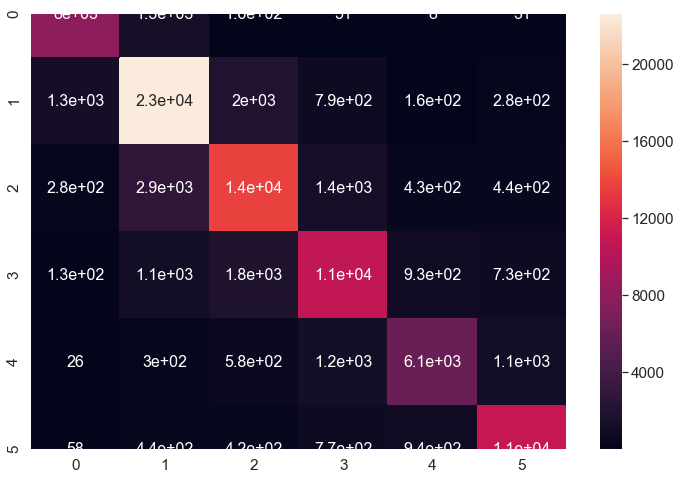

In [24]:
%matplotlib inline
plt.figure(figsize = (12,8))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16})

## Real time Data

In [27]:
#'Days_fly','destination','deptime','arrtime','duration','stops','Day_Name','d_month','s_month','diff_month','search_day']
pred = DT.predict([[14,1,1,1,120,0,6,10,9,1,29]])
#metrics.accuracy_score(pred,y_test)
pred

array([1], dtype=int64)

given Inputs are for 14 days from 29th Sept 2019, DEL-BOM,departure and arrival in morning with 120mins duration non-stop flight <br>
Which gave us a output of 1 which means price range between 3000-4000
<br>
Upon searching on net this what I got and hence the prediction being correct

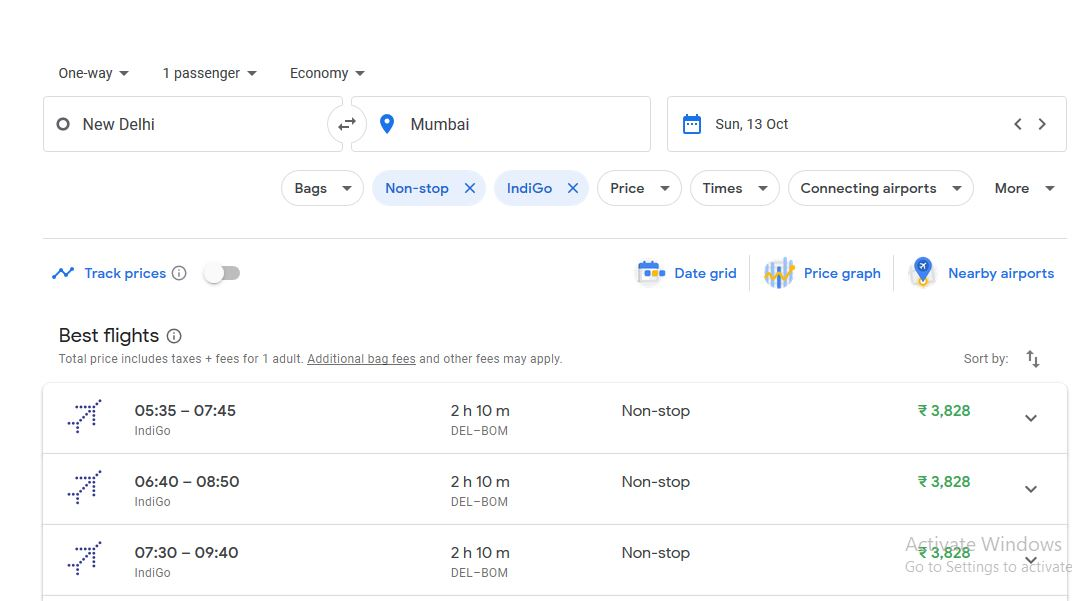

In [29]:
from IPython.display import Image
Image(filename='C:\\Users\\MAHE\\Desktop\\pre.JPG')

With same set of inputs but changing the destination from mumbai to hyderabad<br>
we get the output of 2 which is 4000-5000<br>
which can again be verified and from net and here is the result

In [32]:
pred = DT.predict([[14,2,1,1,120,0,6,10,9,1,29]])
#metrics.accuracy_score(pred,y_test)
pred

array([2], dtype=int64)

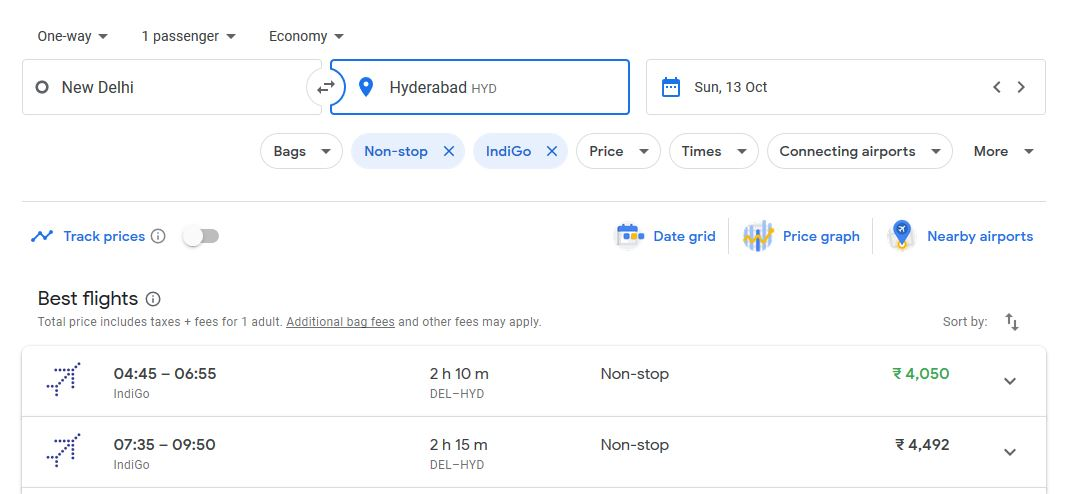

In [33]:
from IPython.display import Image
Image(filename='C:\\Users\\MAHE\\Desktop\\hyd.JPG')

## The prediction in this case was also correct, hence the basic model is working well as of now. <br>
### Further improvements will be made and the model will be deployed. 

In [14]:
#from sklearn import preprocessing
#X_train = preprocessing.scale(X_train)
#X_test = preprocessing.scale(X_test)
X_train

,Days_fly,destination,deptime,arrtime,duration,stops,Day_Name,d_month,s_month,diff_month,search_day
38381,77,1,4,4,135,0,2,10,8,2,14
268375,89,2,3,4,130,0,1,12,9,3,26
233020,79,1,4,3,130,0,5,12,9,3,19
487057,84,2,4,1,130,0,2,2,11,-9,13
285680,16,1,4,4,135,0,2,10,9,1,30
358112,39,3,1,2,100,0,3,11,10,1,13
445690,89,1,4,1,140,0,3,1,11,-10,2
11695,45,1,4,3,135,0,0,9,8,1,9
836696,44,3,4,4,95,0,0,3,2,1,1
535432,40,3,3,4,300,1,5,1,11,-10,25
